In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from astropy.io import fits 
from astropy.table import Table, join

CAresdir = '../StellarResidualsSpring2022/CACloudResiduals/'
modelresdir = '../StellarResidualsSpring2022/Residuals/'
# CA_meta = Table(fits.open(CAresdir + 'CA_meta.fits')[1].data)

In [2]:
CA = Table(fits.open('../CACloudISM/CA_221115.fits')[1].data)
tabfile = '/uufs/chpc.utah.edu/common/home/sdss/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/allStarLite-dr17-synspec_rev1.fits'
allstars = Table(fits.open(tabfile)[1].data)
CA_joined = join(CA, allstars, keys = 'APOGEE_ID', uniq_col_name = '{col_name}{table_name}', table_names = ('', '_2'))
lambda0 = 15272.24

In [3]:
meta = Table(fits.open('../StellarResidualsSpring2022/Residuals/meta.fits')[1].data)

def get_medres(teff, logg, m_h, medres_dir = 'Residuals/'):
    rowselect = np.where(np.logical_and.reduce(
                    [teff >= meta['TEFF_MIN'], teff < meta['TEFF_MAX'], 
                    logg >= meta['LOGG_MIN'], logg < meta['LOGG_MAX'],
                   m_h >= meta['M_H_MIN'], m_h < meta['M_H_MAX']]))[0]
    
    row = meta[rowselect]
    filename = row['FNAME'].item()
    return medres_dir + filename


# teff = star['TEFF'] # 4725.0117
# logg = star['LOGG'] # 2.5071473
# m_h = star['M_H'] # -0.14092



In [4]:
'a' in ['a','b']

True

In [5]:
def get_aspcapStar(row):
    specdir = '/uufs/chpc.utah.edu/common/home/sdss/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/{TELESCOPE}/{FIELD}/'
    specname = 'aspcapStar-dr17-{SOURCEID}.fits'
    telescope = np.array(row['TELESCOPE'], dtype = str)
    field = np.array(row['FIELD'], dtype = str)
    sourceid = np.array(row['APOGEE_ID'], dtype = str)
#     length = len(sourceid)
    path = (specdir + specname).format(TELESCOPE = telescope, FIELD = field, SOURCEID = sourceid)
    return path



SNR 213.67966
287.373


/uufs/chpc.utah.edu/sys/installdir/python/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


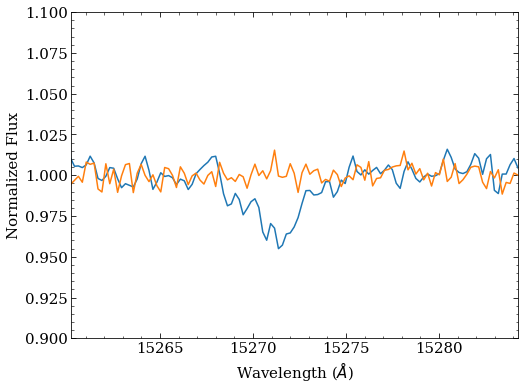

In [6]:
fig, ax = plt.subplots(figsize = (8,6))
N = 851
star = fits.open(get_aspcapStar(CA_joined[N]))

def get_wavs(hdulist = None, rv = 0):
    if hdulist is None:
        CRVAL1 = 4.179
        CDELT1 = 6e-06
        LEN = 8575
    else:
        header = hdulist[1].header
        CRVAL1 = header['CRVAL1']
        CDELT1 = header['CDELT1']
        LEN = header['NAXIS1']
        
    wavs = np.power(10, CRVAL1 + CDELT1 * np.arange(LEN))
    wavs = wavs * (1 + rv / 3e5) # allows for shifting to observed frame from rest frame
    return wavs 


teff = CA_joined[N]['TEFF'] # 4725.0117
logg = CA_joined[N]['LOGG'] # 2.5071473
m_h = CA_joined[N]['M_H'] # -0.14092

medres = fits.open(get_medres(teff, logg, m_h, medres_dir = '../StellarResidualsSpring2022/Residuals/'))

SNR  = CA_joined[N]['SNR']
print('SNR', CA_joined[N]['SNR'])

wavs = get_wavs()
residual = star[1].data / star[3].data
median_residual = medres[1].data
corrected_residual = residual / median_residual

ax.plot(wavs, corrected_residual, label = 'Corrected stellar residual')
ax.set_xlim(lambda0-12, lambda0 + 12)
# ax.fill_between(wavs, residual + star[2].data, residual - star[2].data, color = 'grey')
ax.set_ylim(0.9,1.1)
print(CA_joined[100]['SNR'])

ax.set_xlabel('Wavelength ($\AA$)')
ax.set_ylabel('Normalized Flux')
fig.set_facecolor('white')

plt.plot(wavs, np.random.normal(1, 1/SNR, size = len(wavs)))

plt.show()

In [7]:
CA_joined

APOGEE_ID,TELESCOPE,FIELD,RA,DEC,GLON,GLAT,J,H,K,AK_TARG,AK_WISE,VHELIO_AVG,GAIAEDR3_PARALLAX,TEFF,LOGG,M_H,ALPHA_M,ASPCAP_CHI2,MEDRES_NBIN,FILE,ASPCAPFLAG,GAIAEDR3_PARALLAX_ERROR,SNR,H_ERR,DIST,BAYESTAR_REDDENING_K,BAYESTAR_ERR,W,W_ERR,A,A_ERR,MU,MU_ERR,SIGMA,SIGMA_ERR,DIB_EQW,DIB_EQW_ERR,DIST_ERR,W_NEW,W_ERR_NEW,TELESCOPE_2,FIELD_2,ALT_ID,RA_2,DEC_2,GLON_2,GLAT_2,J_2,J_ERR,H_2,H_ERR_2,K_2,K_ERR,AK_TARG_2,AK_TARG_METHOD,AK_WISE_2,SFD_EBV,APOGEE_TARGET1,APOGEE_TARGET2,APOGEE2_TARGET1,APOGEE2_TARGET2,APOGEE2_TARGET3,APOGEE2_TARGET4,TARGFLAGS,SURVEY,PROGRAMNAME,NVISITS,SNR_2,SNREV,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG_2,VSCATTER,VERR,RV_TEFF,RV_LOGG,RV_FEH,RV_ALPHA,RV_CARB,RV_CHI2,RV_CCFWHM,RV_AUTOFWHM,RV_FLAG,N_COMPONENTS,MEANFIB,SIGFIB,MIN_H,MAX_H,MIN_JK,MAX_JK,GAIAEDR3_SOURCE_ID,GAIAEDR3_PARALLAX_2,GAIAEDR3_PARALLAX_ERROR_2,GAIAEDR3_PMRA,GAIAEDR3_PMRA_ERROR,GAIAEDR3_PMDEC,GAIAEDR3_PMDEC_ERROR,GAIAEDR3_PHOT_G_MEAN_MAG,GAIAEDR3_PHOT_BP_MEAN_MAG,GAIAEDR3_PHOT_RP_MEAN_MAG,GAIAEDR3_DR2_RADIAL_VELOCITY,GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR,GAIAEDR3_R_MED_GEO,GAIAEDR3_R_LO_GEO,GAIAEDR3_R_HI_GEO,GAIAEDR3_R_MED_PHOTOGEO,GAIAEDR3_R_LO_PHOTOGEO,GAIAEDR3_R_HI_PHOTOGEO,ASPCAP_GRID,ASPCAP_CHI2_2,PARAMFLAG [9],ASPCAPFLAG_2,ASPCAPFLAGS,FRAC_BADPIX,FRAC_LOWSNR,FRAC_SIGSKY,X_H [27],X_H_ERR [27],X_M [27],X_M_ERR [27],ELEM_CHI2 [27],ELEMFRAC [27],EXTRATARG,MEMBERFLAG,MEMBER,X_H_SPEC [27],X_M_SPEC [27],TEFF_2,TEFF_ERR,LOGG_2,LOGG_ERR,M_H_2,M_H_ERR,ALPHA_M_2,ALPHA_M_ERR,VMICRO,VMACRO,VSINI,TEFF_SPEC,LOGG_SPEC,C_FE,C_FE_SPEC,C_FE_ERR,C_FE_FLAG,CI_FE,CI_FE_SPEC,CI_FE_ERR,CI_FE_FLAG,N_FE,N_FE_SPEC,N_FE_ERR,N_FE_FLAG,O_FE,O_FE_SPEC,O_FE_ERR,O_FE_FLAG,NA_FE,NA_FE_SPEC,NA_FE_ERR,NA_FE_FLAG,MG_FE,MG_FE_SPEC,MG_FE_ERR,MG_FE_FLAG,AL_FE,AL_FE_SPEC,AL_FE_ERR,AL_FE_FLAG,SI_FE,SI_FE_SPEC,SI_FE_ERR,SI_FE_FLAG,P_FE,P_FE_SPEC,P_FE_ERR,P_FE_FLAG,S_FE,S_FE_SPEC,S_FE_ERR,S_FE_FLAG,K_FE,K_FE_SPEC,K_FE_ERR,K_FE_FLAG,CA_FE,CA_FE_SPEC,CA_FE_ERR,CA_FE_FLAG,TI_FE,TI_FE_SPEC,TI_FE_ERR,TI_FE_FLAG,TIII_FE,TIII_FE_SPEC,TIII_FE_ERR,TIII_FE_FLAG,V_FE,V_FE_SPEC,V_FE_ERR,V_FE_FLAG,CR_FE,CR_FE_SPEC,CR_FE_ERR,CR_FE_FLAG,MN_FE,MN_FE_SPEC,MN_FE_ERR,MN_FE_FLAG,FE_H,FE_H_SPEC,FE_H_ERR,FE_H_FLAG,CO_FE,CO_FE_SPEC,CO_FE_ERR,CO_FE_FLAG,NI_FE,NI_FE_SPEC,NI_FE_ERR,NI_FE_FLAG,CU_FE,CU_FE_SPEC,CU_FE_ERR,CU_FE_FLAG,CE_FE,CE_FE_SPEC,CE_FE_ERR,CE_FE_FLAG
str30,str6,str20,float64,float64,float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,str27,int64,float32,float32,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,str6,str20,str30,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,str32,float32,float32,int32,int32,int32,int32,int32,int32,str132,str32,str32,int32,float32,float32,int64,str132,int64,str132,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,float32,int64,int64,str256,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int64,str10,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float32,int32,float32,float32,float

119.291855


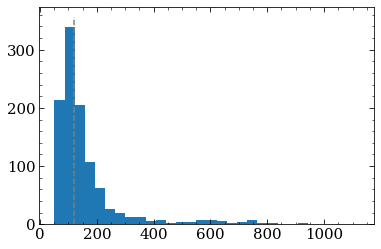

In [8]:
plt.hist(CA_joined['SNR'], bins = 30)
mid_snr = np.median(CA_joined['SNR'])
print(mid_snr)
plt.plot((mid_snr, mid_snr), plt.gca().get_ylim(), linestyle='dashed', color = 'grey')

In [18]:
print(len(np.where(CA_joined['SNR'] > 100)[0]))

702
